<a href="https://colab.research.google.com/github/sujal-garg/GDSC-AI-ML-Workshop/blob/main/Diabetes_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#importing libraries

In [4]:
#importing libraries
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

# Step 1 Loading the Dataset 

In [5]:
dataset = pd.read_csv('/content/diabetes.csv')
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [6]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
dataset.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

##About the data
###1. No null value in the data
###2. Inconsistent data
###3. 0 means no diabetes, 1 means diabetes

# Step 2: Visualizing the Data

<Axes: xlabel='Outcome', ylabel='count'>

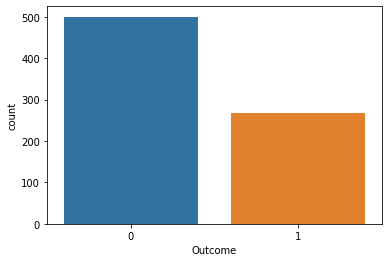

In [10]:
sns.countplot(x='Outcome', data= dataset)

<Axes: xlabel='BMI', ylabel='count'>

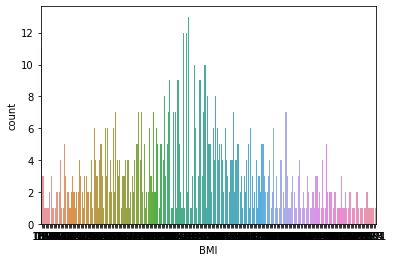

In [11]:
sns.countplot(x='BMI', data= dataset)

#Step 3: Data Preprocessing

In [12]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
dataset_scaled =sc.fit_transform(dataset)

In [24]:
X= dataset.drop('Outcome', axis =1)
y= dataset['Outcome']

In [25]:

from sklearn.model_selection import train_test_split



In [26]:
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [27]:
print("X_train shape:", X_train.shape)
print("X_test shape:",X_test.shape)
print("y_train shape:",y_train.shape)
print("y_test shape:",y_test.shape)

X_train shape: (576, 8)
X_test shape: (192, 8)
y_train shape: (576,)
y_test shape: (192,)


In [17]:
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
573,2,98,60,17,120,34.7,0.198,22
227,3,162,52,38,0,37.2,0.652,24
725,4,112,78,40,0,39.4,0.236,38
187,1,128,98,41,58,32.0,1.321,33
456,1,135,54,0,0,26.7,0.687,62


In [28]:
y_train.head()

599    0
381    0
424    1
675    1
158    0
Name: Outcome, dtype: int64

#Data Medelling

In [19]:
model = tf.keras.Sequential()

In [20]:
model.add(tf.keras.layers.Dense(12,activation='relu',input_dim=8))
model.add(tf.keras.layers.Dense(12,activation='relu'))
model.add(tf.keras.layers.Dropout(.2))
model.add(tf.keras.layers.Dense(12,activation='relu'))

model.add(tf.keras.layers.Dense(1,activation='sigmoid')) #output layer


In [21]:
model.compile(loss='mse', optimizer = 'adam',metrics=['accuracy'])

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                108       
                                                                 
 dense_1 (Dense)             (None, 12)                156       
                                                                 
 dropout (Dropout)           (None, 12)                0         
                                                                 
 dense_2 (Dense)             (None, 12)                156       
                                                                 
 dense_3 (Dense)             (None, 1)                 13        
                                                                 
Total params: 433
Trainable params: 433
Non-trainable params: 0
_________________________________________________________________


#Testing the model
## Feeding the model with training and testing data


In [30]:
model.fit(X_train, y_train, epochs=2500, batch_size=15,validation_data =(X_test,y_test))

Streaming output truncated to the last 5000 lines.
39/39 [==============================] - 1s 8ms/step - loss: 0.3532 - accuracy: 0.6354 - val_loss: 0.3585 - val_accuracy: 0.6406
Epoch 2/2500
39/39 [==============================] - 0s 3ms/step - loss: 0.3479 - accuracy: 0.6441 - val_loss: 0.3575 - val_accuracy: 0.6406
Epoch 3/2500
39/39 [==============================] - 0s 4ms/step - loss: 0.3501 - accuracy: 0.6389 - val_loss: 0.3535 - val_accuracy: 0.6458
Epoch 4/2500
39/39 [==============================] - 0s 3ms/step - loss: 0.3429 - accuracy: 0.6267 - val_loss: 0.3482 - val_accuracy: 0.6406
Epoch 5/2500
39/39 [==============================] - 0s 3ms/step - loss: 0.3263 - accuracy: 0.6528 - val_loss: 0.3478 - val_accuracy: 0.6406
Epoch 6/2500
39/39 [==============================] - 0s 3ms/step - loss: 0.3268 - accuracy: 0.6476 - val_loss: 0.3186 - val_accuracy: 0.6406
Epoch 7/2500
39/39 [==============================] - 0s 3ms/step - loss: 0.2900 - accuracy: 0.6545 - val_loss

In [34]:
print(model.predict(np.array([0,65,64,120.5,42,45,4,32]).reshape((1,8))))

1/1 [==============================] - 0s 31ms/step
[[0.998491]]
